In [1]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

Welcome to JupyROOT 6.12/04


In [2]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [9]:
masses = [('60','20'),('6p0','2p0')]
ctaus = [10,100]#, 10, 100, 1000]
cuts = np.arange(0,7)
# triggerPath = 'TRIG_dsa_HLT_DoubleMu3_DCA_PFMET50_PFMHT60'
triggerPath = 'SREffi_dsa'
baseDir = '../Firefighter/washAOD/'
fileName = lambda Mchi, dMchi, ctau: baseDir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

numParams = len(masses)*len(ctaus)
countMasses = 0

dfs = OrderedDict({})
numEvents = OrderedDict({})
for (Mchi, dMchi) in masses:
    countCtaus = 1
    dfs[Mchi] = OrderedDict({})
    numEvents[Mchi] = OrderedDict({})
    for ctau in ctaus:
        dfs[Mchi][ctau] = OrderedDict({})
        for cut in cuts:
            dfs[Mchi][ctau][cut] = uproot.open(fileName(Mchi, dMchi, ctau))[triggerPath + f'/cut{cut}'].pandas.df()
#         numEvents[Mchi][ctau] = uproot.open(fileName(Mchi, dMchi, ctau))[triggerPath + '/overallInfo'].pandas.df()
        print(f'{countMasses*len(ctaus)+countCtaus} of {numParams}: ' + fileName(Mchi, dMchi, ctau))
        countCtaus += 1
    countMasses += 1

1 of 4: ../Firefighter/washAOD/Mchi-60_dMchi-20_ctau-10.root
2 of 4: ../Firefighter/washAOD/Mchi-60_dMchi-20_ctau-100.root
3 of 4: ../Firefighter/washAOD/Mchi-6p0_dMchi-2p0_ctau-10.root
4 of 4: ../Firefighter/washAOD/Mchi-6p0_dMchi-2p0_ctau-100.root


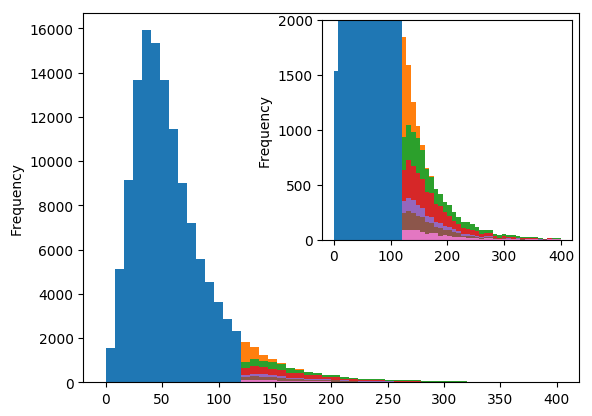

In [36]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['60'][10][cut]['recoPFMetPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,400))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['60'][10][cut]['recoPFMetPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,2000),range=(0,400))

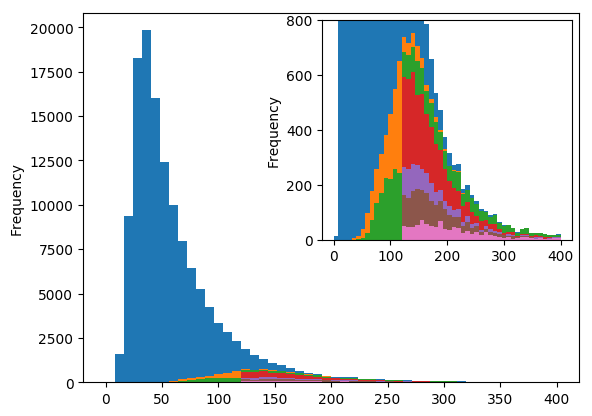

In [42]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['60'][10][cut]['recoPFJetPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,400))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['60'][10][cut]['recoPFJetPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,800),range=(0,400))

In [ ]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['60'][10][cut]['recoPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,100))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['60'][10][cut]['recoPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,2000),range=(0,100))